<a href="https://colab.research.google.com/github/anderw1ll/Dados---BDMEP/blob/main/Dados_BDMEP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

# Lendo os arquivos CSV
df_florianopolis = pd.read_csv('https://raw.githubusercontent.com/anderw1ll/Dados---BDMEP/main/dados_A806_M_2003-01-21_2023-09-01.csv', skiprows= range(0, 10), sep=';', decimal=',', parse_dates=['Data Medicao'])
df_itajai = pd.read_csv('https://raw.githubusercontent.com/anderw1ll/Dados---BDMEP/main/dados_A868_M_2010-06-23_2023-09-01.csv', skiprows= range(0, 10), sep=';', decimal=',', parse_dates=['Data Medicao'])

# Removendo a coluna 'Unnamed: 4' que não tem dados
df_florianopolis = df_florianopolis.drop(df_florianopolis.columns[4], axis=1)
df_itajai = df_itajai.drop(df_itajai.columns[4], axis=1)

# Verificando as informações dos dataframes
df_florianopolis.info()
df_itajai.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Data Medicao                                 249 non-null    datetime64[ns]
 1   PRECIPITACAO TOTAL, MENSAL (AUT)(mm)         216 non-null    float64       
 2   PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)  227 non-null    float64       
 3   TEMPERATURA MEDIA, MENSAL (AUT)(°C)          231 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Data Medicao                                 160 non-null    datetime64[ns]
 1  

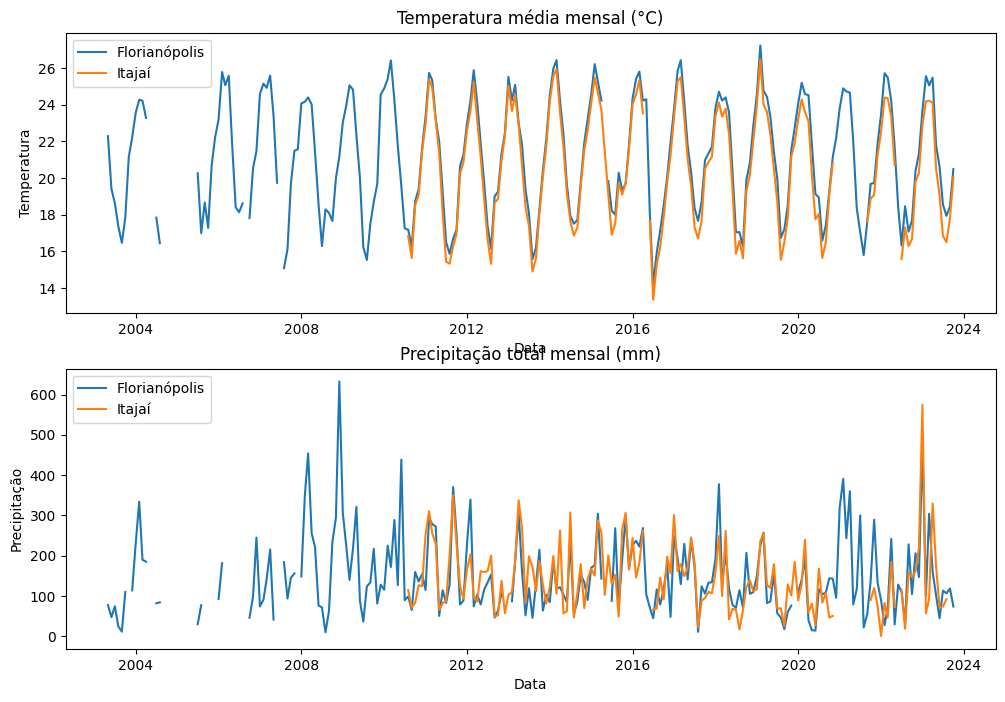

In [29]:
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
plt.figure(figsize=(12,8))

# Plotando a temperatura média mensal
plt.subplot(2,1,1)
plt.plot(df_florianopolis['Data Medicao'], df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], label='Florianópolis')
plt.plot(df_itajai['Data Medicao'], df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], label='Itajaí')
plt.title('Temperatura média mensal (°C)')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()

# Plotando a precipitação total mensal
plt.subplot(2,1,2)
plt.plot(df_florianopolis['Data Medicao'], df_florianopolis['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], label='Florianópolis')
plt.plot(df_itajai['Data Medicao'], df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], label='Itajaí')
plt.title('Precipitação total mensal (mm)')
plt.xlabel('Data')
plt.ylabel('Precipitação')
plt.legend()

# Mostrando os gráficos
plt.show()


In [30]:
# Preparando os dados preenchendo os valores vazios com as médias mensais.

florianopolis_media_pressao = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].mean()
florianopolis_media_temperatura = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].mean()
florianopolis_media_preciptacao = df_florianopolis.groupby(df_florianopolis['Data Medicao'].dt.month)['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()

for mes in florianopolis_media_pressao.index:
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].isnull()), 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = florianopolis_media_preciptacao[mes]
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].isnull()), 'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'] = florianopolis_media_pressao[mes]
    df_florianopolis.loc[(df_florianopolis['Data Medicao'].dt.month == mes) & (df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].isnull()), 'TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = florianopolis_media_temperatura[mes]

itajai_media_pressao = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].mean()
itajai_media_temperatura = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].mean()
itajai_media_preciptacao = df_itajai.groupby(df_itajai['Data Medicao'].dt.month)['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()

for mes in itajai_media_pressao.index:
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].isnull()), 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = itajai_media_preciptacao[mes]
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'].isnull()), 'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)'] = itajai_media_pressao[mes]
    df_itajai.loc[(df_itajai['Data Medicao'].dt.month == mes) & (df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'].isnull()), 'TEMPERATURA MEDIA, MENSAL (AUT)(°C)'] = itajai_media_temperatura[mes]



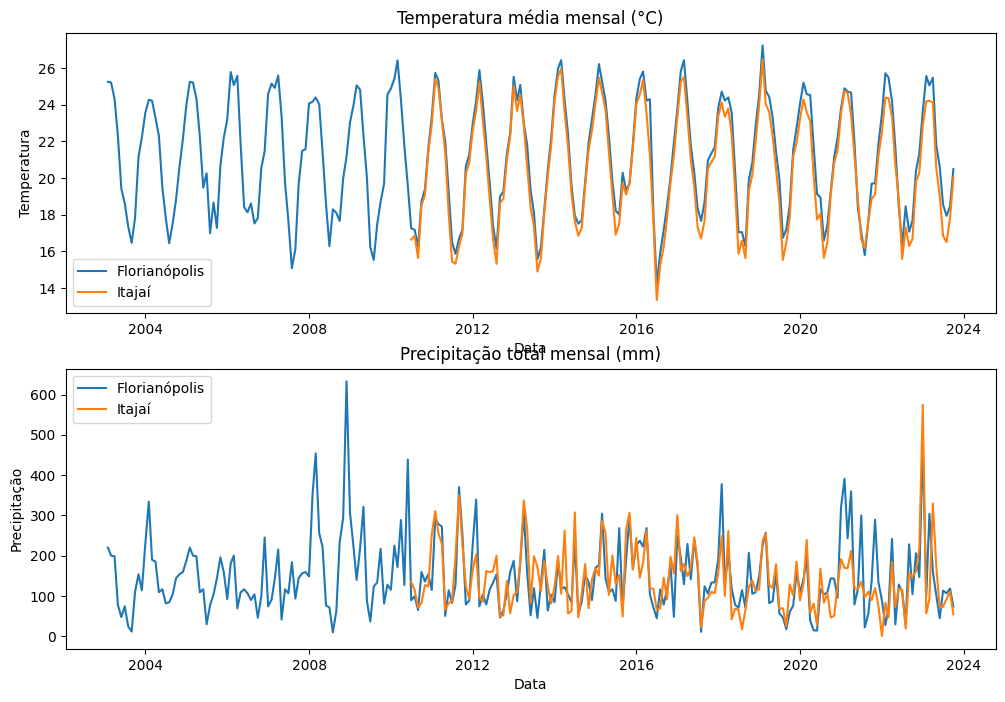

In [31]:
# Definindo o tamanho da figura
plt.figure(figsize=(12,8))

# Plotando a temperatura média mensal
plt.subplot(2,1,1)
plt.plot(df_florianopolis['Data Medicao'], df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], label='Florianópolis')
plt.plot(df_itajai['Data Medicao'], df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)'], label='Itajaí')
plt.title('Temperatura média mensal (°C)')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()

# Plotando a precipitação total mensal
plt.subplot(2,1,2)
plt.plot(df_florianopolis['Data Medicao'], df_florianopolis['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], label='Florianópolis')
plt.plot(df_itajai['Data Medicao'], df_itajai['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], label='Itajaí')
plt.title('Precipitação total mensal (mm)')
plt.xlabel('Data')
plt.ylabel('Precipitação')
plt.legend()

# Mostrando os gráficos
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Definindo o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Preparando os dados
X_florianopolis = df_florianopolis['Data Medicao'].dt.month.values.reshape(-1, 1)  # usamos o mês como variável independente
y_florianopolis = df_florianopolis['TEMPERATURA MEDIA, MENSAL (AUT)(°C)']  # usamos a temperatura como variável dependente

# Dividindo os dados em conjuntos de treino e teste
X_train_florianopolis, X_test_florianopolis, y_train_florianopolis, y_test_florianopolis = train_test_split(X_florianopolis, y_florianopolis, test_size=0.2, random_state=42)

# Treinando o modelo com os dados de treino de Florianópolis
model.fit(X_train_florianopolis, y_train_florianopolis)

# Fazendo as previsões para cada mês de 2024 para Florianópolis
predictions_2024_florianopolis = model.predict(np.arange(1, 13).reshape(-1, 1))

# Preparando os dados de Itajaí
X_itajai = df_itajai['Data Medicao'].dt.month.values.reshape(-1, 1)  # usamos o mês como variável independente
y_itajai = df_itajai['TEMPERATURA MEDIA, MENSAL (AUT)(°C)']  # usamos a temperatura como variável dependente

# Dividindo os dados em conjuntos de treino e teste para Itajaí
X_train_itajai, X_test_itajai, y_train_itajai, y_test_itajai = train_test_split(X_itajai, y_itajai, test_size=0.2, random_state=42)

# Treinando o modelo com os dados de treino de Itajaí
model.fit(X_train_itajai, y_train_itajai)

# Fazendo as previsões para cada mês de 2024 para Itajaí
predictions_2024_itajai = model.predict(np.arange(1, 13).reshape(-1, 1))




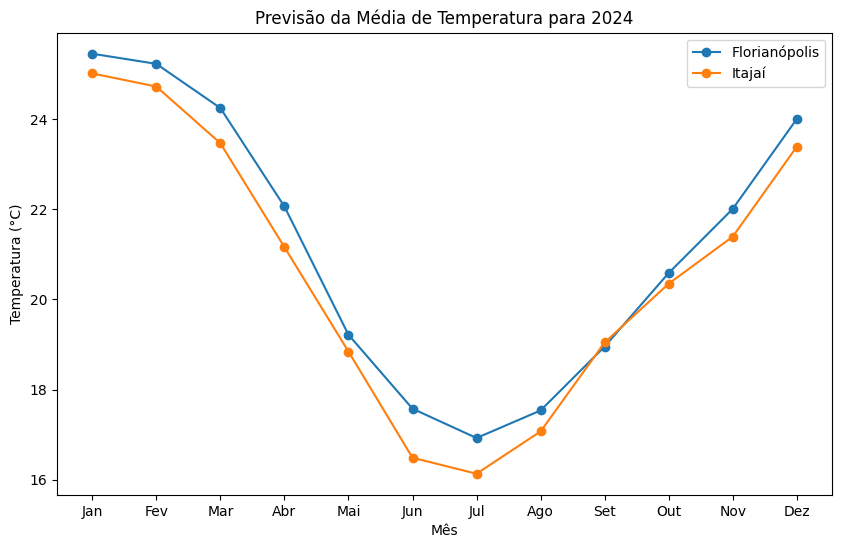

In [35]:
# Definindo o tamanho da figura
plt.figure(figsize=(10,6))

# Plotando as previsões de temperatura para cada mês de 2024 em Florianópolis
plt.plot(months, predictions_2024, marker='o', label='Florianópolis')

# Plotando as previsões de temperatura para cada mês de 2024 em Itajaí
plt.plot(months, predictions_2024_itajai, marker='o', label='Itajaí')

# Adicionando títulos e rótulos
plt.title('Previsão da Média de Temperatura para 2024')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Mostrando o gráfico
plt.show()
